In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,156 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [123]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import os
os.chdir("/content/drive/MyDrive//금융데이터 공모전")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_excel("머신러닝을 위한 학습자료(월을 기준으로 합쳐서 숫자화).xlsx")
df=df.iloc[:,:-5]

In [5]:
df

,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,시군구,법정동코드,매출금액,매출건수
0,201903,10,1010,0,40.0,3,구로구,11530109.0,782521,13
1,201903,21,2110,0,20.0,2,구로구,11530109.0,963789,29
2,201903,19,1913,0,30.0,2,구로구,11530109.0,924309,46
3,201903,21,2111,0,30.0,2,구로구,11530109.0,1089360,54
4,201903,17,1710,0,30.0,2,구로구,11530109.0,1656740,58
...,...,...,...,...,...,...,...,...,...,...
306117,202103,20,2013,0,30.0,1,영등포구,11560108.0,1411368,7
306118,202103,21,2110,1,30.0,1,영등포구,11560108.0,1386040,63
306119,202103,11,1113,0,30.0,2,영등포구,11560108.0,390818,7
306120,202103,16,1610,1,40.0,3,영등포구,11560108.0,327592,7


In [6]:
df2= pd.read_csv("신한은행데이터통합.csv", encoding='utf-8')

In [7]:
df2

,Unnamed: 0,기준년월,지역구,법정동코드,법정동,집계구코드,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,0,201903,강남구,11680101,역삼동,1123064010001,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,1,201903,강남구,11680101,역삼동,1123064010001,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,2,201903,강남구,11680101,역삼동,1123064010001,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,3,201903,강남구,11680101,역삼동,1123064010001,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,4,201903,강남구,11680101,역삼동,1123064010001,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039563,211881,202103,중랑구,11260106,신내동,1107070010802,5,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
1039564,211882,202103,중랑구,11260106,신내동,1107070010802,6,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
1039565,211883,202103,중랑구,11260106,신내동,1107070010802,6,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
1039566,211884,202103,중랑구,11260106,신내동,1107070010802,7,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


In [8]:
grouped1 = df2[['총소비금액','총수신금액','예적금금액','주택대출금액','전세자금대출금액']].groupby([df2['기준년월'],df2['지역구'],df2['법정동코드'],df2['나이'],df2['성별']]).mean()

In [9]:
grouped1.rename(columns={'총소비금액':'소비금액','총수신금액':'수신금액'}, inplace=True)

In [10]:
grouped1.to_csv("신한은행 지역구 나이성별 평균소비금액.csv")

In [11]:
grouped1=pd.read_csv("신한은행 지역구 나이성별 평균소비금액.csv")

In [12]:
grouped1 ### 컬럼이름 평균소비금액으로 바꾸기, ## 나이 20, 30으로 바꾸기 ## 성별 0과 1로 바꾸기 

,기준년월,지역구,법정동코드,나이,성별,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,2,1,1.100992e+06,2.181022e+06,2.000722e+06,0.000000,0.000000e+00
1,201903,강남구,11680101,2,2,1.386450e+06,3.122278e+06,3.254774e+06,0.000000,0.000000e+00
2,201903,강남구,11680101,3,1,1.757887e+06,4.679668e+06,4.659561e+06,0.000000,1.763071e+06
3,201903,강남구,11680101,3,2,1.983425e+06,5.570328e+06,6.248569e+06,0.000000,0.000000e+00
4,201903,강남구,11680101,4,1,2.095323e+06,5.391524e+06,4.797017e+06,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
25022,202103,중랑구,11260106,5,2,1.576542e+06,5.808273e+06,7.741955e+06,0.000000,0.000000e+00
25023,202103,중랑구,11260106,6,1,1.348300e+06,4.804389e+06,1.825370e+06,0.000000,0.000000e+00
25024,202103,중랑구,11260106,6,2,1.185163e+06,6.711546e+06,9.544784e+06,0.000000,0.000000e+00
25025,202103,중랑구,11260106,7,1,8.255397e+05,3.857217e+06,4.870158e+05,0.000000,0.000000e+00


In [13]:
grouped1["나이"] = grouped1["나이"].apply(lambda x: 18 if x < 2 else 20 if x==2 else 30 if x==3 else 40 if x==4 else 50 if x==5 else 60.9) 

In [14]:
grouped1["성별"] = grouped1["성별"].apply(lambda x: 0 if x == 2 else 1)  ###성별 열의 값이 2이면 0으로 바꿔라 그렇지 않으면 1로두어라

In [15]:
grouped1

,기준년월,지역구,법정동코드,나이,성별,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,201903,강남구,11680101,20.0,1,1.100992e+06,2.181022e+06,2.000722e+06,0.000000,0.000000e+00
1,201903,강남구,11680101,20.0,0,1.386450e+06,3.122278e+06,3.254774e+06,0.000000,0.000000e+00
2,201903,강남구,11680101,30.0,1,1.757887e+06,4.679668e+06,4.659561e+06,0.000000,1.763071e+06
3,201903,강남구,11680101,30.0,0,1.983425e+06,5.570328e+06,6.248569e+06,0.000000,0.000000e+00
4,201903,강남구,11680101,40.0,1,2.095323e+06,5.391524e+06,4.797017e+06,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
25022,202103,중랑구,11260106,50.0,0,1.576542e+06,5.808273e+06,7.741955e+06,0.000000,0.000000e+00
25023,202103,중랑구,11260106,60.9,1,1.348300e+06,4.804389e+06,1.825370e+06,0.000000,0.000000e+00
25024,202103,중랑구,11260106,60.9,0,1.185163e+06,6.711546e+06,9.544784e+06,0.000000,0.000000e+00
25025,202103,중랑구,11260106,60.9,1,8.255397e+05,3.857217e+06,4.870158e+05,0.000000,0.000000e+00


In [16]:
grouped1['나이']

0        20.0
1        20.0
2        30.0
3        30.0
4        40.0
         ... 
25022    50.0
25023    60.9
25024    60.9
25025    60.9
25026    60.9
Name: 나이, Length: 25027, dtype: float64

In [17]:
grouped1.columns

Index(['기준년월', '지역구', '법정동코드', '나이', '성별', '소비금액', '수신금액', '예적금금액', '주택대출금액',
       '전세자금대출금액'],
      dtype='object')

In [18]:
Combined_machine=pd.merge(df, grouped1, how= 'inner',left_on =['기준년월', '성별', '연령', '시군구', '법정동코드'], right_on=['기준년월', '성별', '나이', '지역구', '법정동코드'])

In [19]:
Combined_machine=Combined_machine.drop(columns=['나이','지역구','시군구'])

In [20]:
Combined_machine.to_csv("Combined_machine.csv")

### 1.성별 맞추기

In [21]:
X=Combined_machine.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
y=Combined_machine.iloc[:,[3]]

In [22]:
X

,기준년월,품목대분류코드,품목중분류코드,연령,가구생애주기,법정동코드,매출금액,매출건수,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,201903,10,1010,40.0,3,11530109.0,782521,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
1,201903,11,1110,40.0,3,11530109.0,280991,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
2,201903,19,1913,40.0,3,11530109.0,900212,42,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
3,201903,21,2112,40.0,3,11530109.0,605756,29,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
4,201903,16,1610,40.0,3,11530109.0,419276,21,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315197,202103,21,2110,50.0,4,11170124.0,720728,17,2.040090e+06,9.000598e+06,3.114286e+05,0.0,0.0
315198,202103,21,2110,60.9,5,11290110.0,385208,7,1.627805e+06,7.466260e+06,0.000000e+00,0.0,0.0
315199,202103,21,2110,60.9,5,11290110.0,385208,7,1.435750e+05,7.370239e+06,0.000000e+00,0.0,0.0
315200,202103,21,2110,60.9,5,11560109.0,926404,10,1.597284e+06,8.530831e+06,9.429980e+06,0.0,0.0


In [23]:
y

,성별
0,0
1,0
2,0
3,0
4,0
...,...
315197,1
315198,0
315199,0
315200,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
from sklearn.model_selection  import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [26]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [27]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [28]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     40044
           1       0.99      0.97      0.98     22997

    accuracy                           0.99     63041
   macro avg       0.99      0.99      0.99     63041
weighted avg       0.99      0.99      0.99     63041



In [29]:
featureImportance = baseline.feature_importances_

In [30]:
featureImportance

array([0.02866677, 0.01385422, 0.02417812, 0.05621309, 0.0253096 ,
       0.12887495, 0.02878473, 0.02909174, 0.14120917, 0.16032085,
       0.30470877, 0.02726966, 0.03151834])

In [31]:
featureImportance

array([0.02866677, 0.01385422, 0.02417812, 0.05621309, 0.0253096 ,
       0.12887495, 0.02878473, 0.02909174, 0.14120917, 0.16032085,
       0.30470877, 0.02726966, 0.03151834])

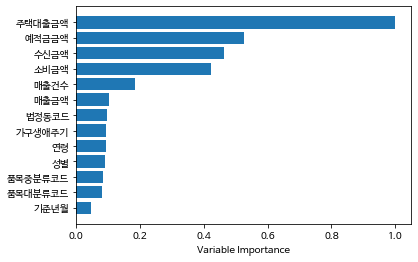

In [32]:
import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos,X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

In [33]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [34]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9,10], 
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.5,0.8,1]
              }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [35]:
xgbc = XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8524928221316286


Text(0.5, 1.0, 'Feature importance')

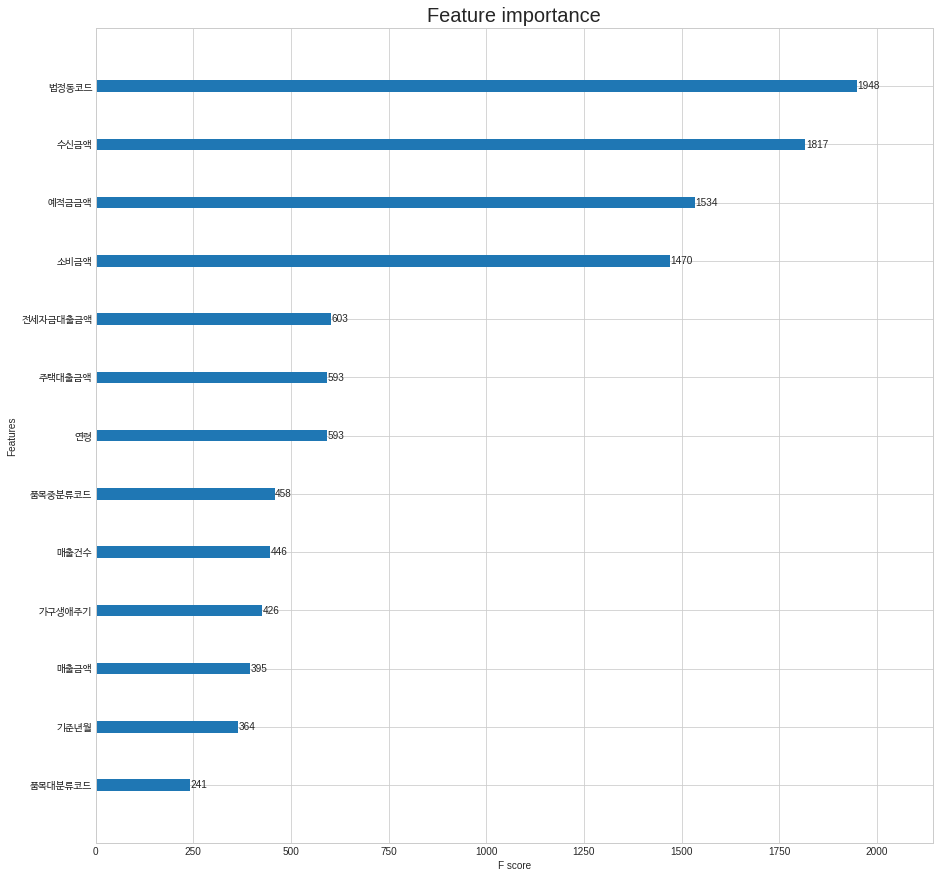

In [36]:
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc, ax=ax)
plt.yticks(fontproperties='NanumBarunGothic') 
plt.title('Feature importance',fontsize=20)

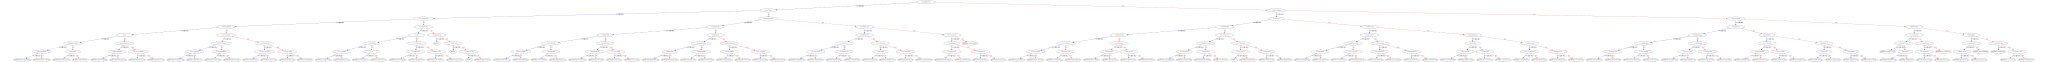

In [37]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

### 2.여성의류 중분류코드 1010 맞추기  

In [ ]:
## 먼저 1010 코드를 1로 다바꾸고 나머지는 0으로 둔다

In [38]:
Fcloth=pd.read_csv("Combined_machine.csv")

In [39]:
Fcloth["품목중분류코드"] = Fcloth["품목중분류코드"].apply(lambda x: 1 if x == 1010 else 0)

In [43]:
Fcloth

,Unnamed: 0,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,법정동코드,매출금액,매출건수,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,0,201903,10,1,0,40.0,3,11530109.0,782521,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
1,1,201903,11,0,0,40.0,3,11530109.0,280991,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
2,2,201903,19,0,0,40.0,3,11530109.0,900212,42,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
3,3,201903,21,0,0,40.0,3,11530109.0,605756,29,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
4,4,201903,16,0,0,40.0,3,11530109.0,419276,21,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315197,315197,202103,21,0,1,50.0,4,11170124.0,720728,17,2.040090e+06,9.000598e+06,3.114286e+05,0.0,0.0
315198,315198,202103,21,0,0,60.9,5,11290110.0,385208,7,1.627805e+06,7.466260e+06,0.000000e+00,0.0,0.0
315199,315199,202103,21,0,0,60.9,5,11290110.0,385208,7,1.435750e+05,7.370239e+06,0.000000e+00,0.0,0.0
315200,315200,202103,21,0,0,60.9,5,11560109.0,926404,10,1.597284e+06,8.530831e+06,9.429980e+06,0.0,0.0


In [49]:
X=Fcloth.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14]]
y=Fcloth.iloc[:,[3]]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [51]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [52]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     61550
           1       0.34      0.13      0.19      1491

    accuracy                           0.97     63041
   macro avg       0.66      0.56      0.59     63041
weighted avg       0.96      0.97      0.97     63041



In [54]:
featureImportance = baseline.feature_importances_

In [55]:
featureImportance

array([0.02910475, 0.27551529, 0.00895691, 0.01719803, 0.02487974,
       0.08593329, 0.16060267, 0.10417144, 0.08924314, 0.08971462,
       0.08991939, 0.00874041, 0.01602033])

In [56]:
featureImportance

array([0.02910475, 0.27551529, 0.00895691, 0.01719803, 0.02487974,
       0.08593329, 0.16060267, 0.10417144, 0.08924314, 0.08971462,
       0.08991939, 0.00874041, 0.01602033])

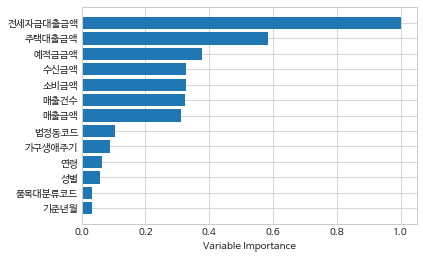

In [65]:
import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos,X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

In [58]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [59]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9,10], 
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.5,0.8,1]
              }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [60]:
xgbc = XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9763487254326549


Text(0.5, 1.0, 'Feature importance')

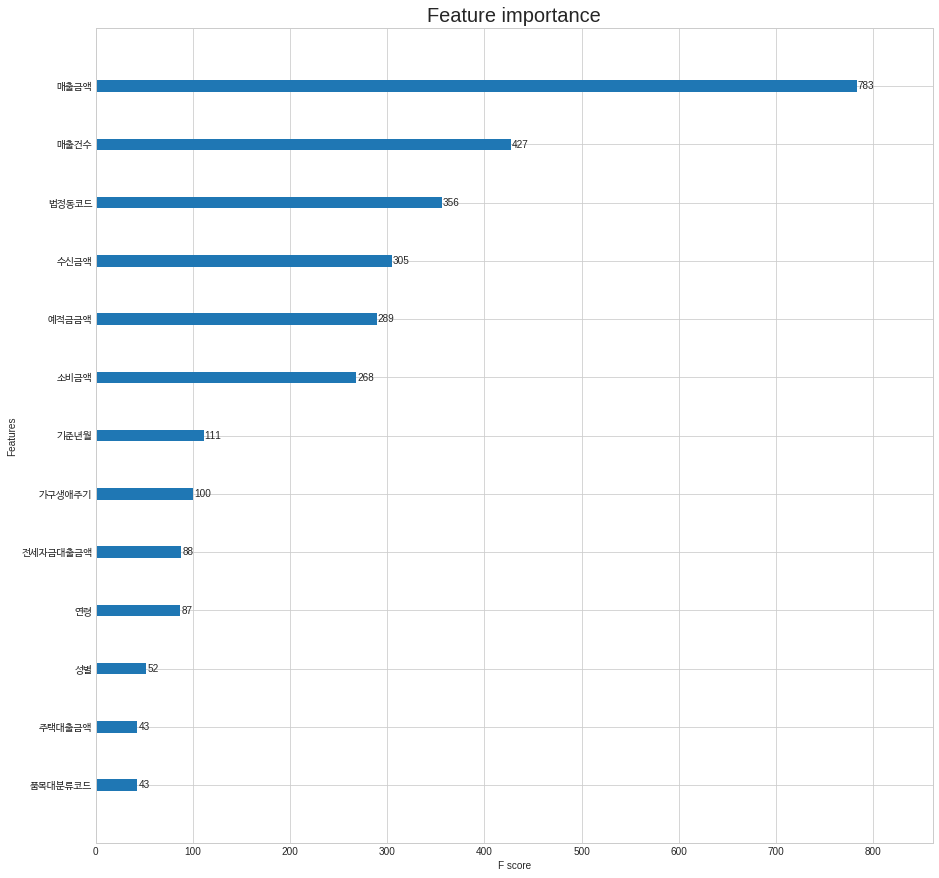

In [61]:
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc, ax=ax)
plt.yticks(fontproperties='NanumBarunGothic') 
plt.title('Feature importance',fontsize=20)

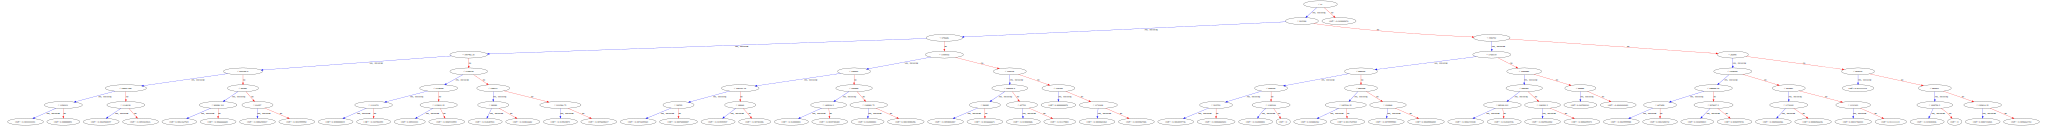

In [62]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

### 디지털 구입 여부에 대해서 예측해보자 (코드 1511)

In [128]:
b_predict=pd.read_csv("Combined_machine.csv")

In [129]:
b_predict["품목중분류코드"] = b_predict["품목중분류코드"].apply(lambda x: 1 if x == 1511 else 0)

In [130]:
b_predict

,Unnamed: 0,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,법정동코드,매출금액,매출건수,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,0,201903,10,0,0,40.0,3,11530109.0,782521,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
1,1,201903,11,0,0,40.0,3,11530109.0,280991,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
2,2,201903,19,0,0,40.0,3,11530109.0,900212,42,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
3,3,201903,21,0,0,40.0,3,11530109.0,605756,29,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
4,4,201903,16,0,0,40.0,3,11530109.0,419276,21,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315197,315197,202103,21,0,1,50.0,4,11170124.0,720728,17,2.040090e+06,9.000598e+06,3.114286e+05,0.0,0.0
315198,315198,202103,21,0,0,60.9,5,11290110.0,385208,7,1.627805e+06,7.466260e+06,0.000000e+00,0.0,0.0
315199,315199,202103,21,0,0,60.9,5,11290110.0,385208,7,1.435750e+05,7.370239e+06,0.000000e+00,0.0,0.0
315200,315200,202103,21,0,0,60.9,5,11560109.0,926404,10,1.597284e+06,8.530831e+06,9.429980e+06,0.0,0.0


In [131]:
X=b_predict.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14]]
y=b_predict.iloc[:,[3]]

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [133]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [134]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [135]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     60593
           1       0.76      0.76      0.76      2448

    accuracy                           0.98     63041
   macro avg       0.88      0.87      0.87     63041
weighted avg       0.98      0.98      0.98     63041



In [136]:
featureImportance = baseline.feature_importances_

In [137]:
featureImportance

array([0.01965602, 0.53542739, 0.01100171, 0.0125766 , 0.01705685,
       0.05227224, 0.10311394, 0.08144854, 0.04978744, 0.05092805,
       0.05063391, 0.00631954, 0.00977777])

In [ ]:
### 전세자금대출, 주택대출이 많다는 것은 큰집 or 새로 이사한 집으로 해석가능, 그렇지 않더라도 집을 보유하고 있다는 거니깐 집을 보여할 수록 가전 많이 필요

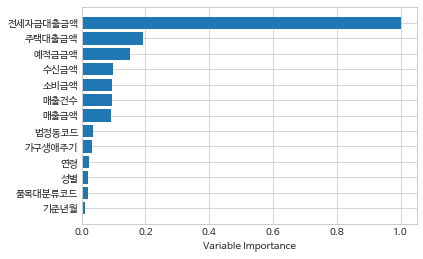

In [139]:
import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

In [125]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [126]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9,10], 
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.5,0.8,1]
              }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [127]:
xgbc = XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.957012103234403


Text(0.5, 1.0, 'Feature importance')

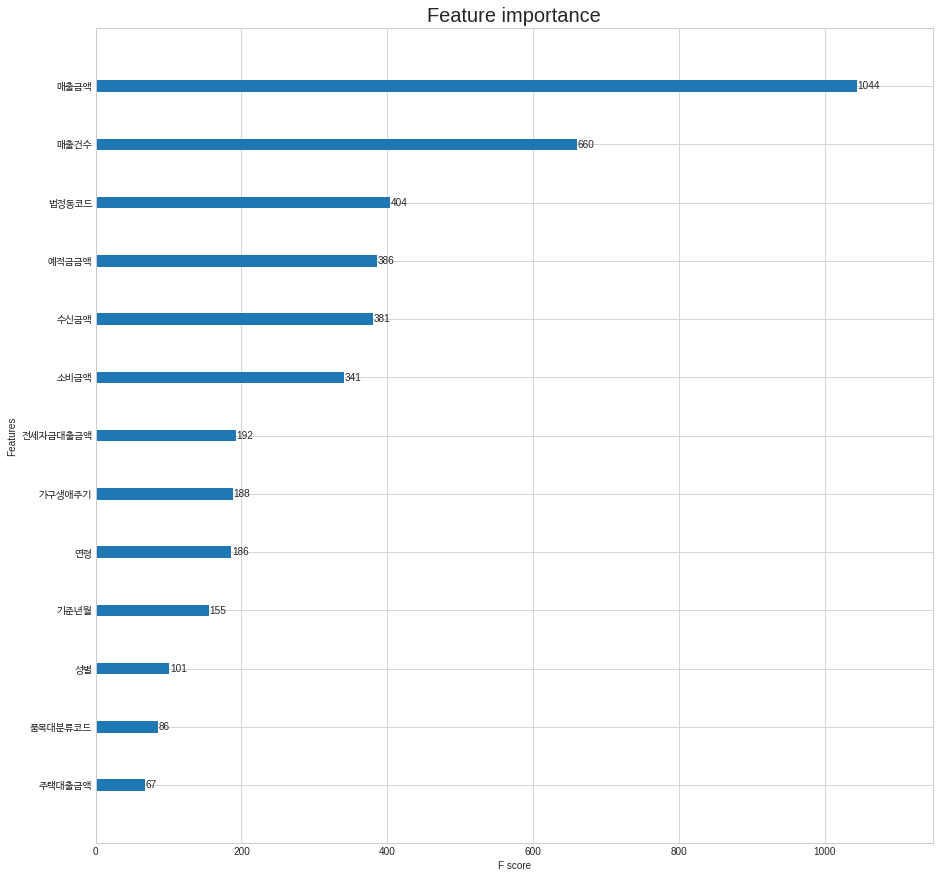

In [101]:
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc, ax=ax)
plt.yticks(fontproperties='NanumBarunGothic') 
plt.title('Feature importance',fontsize=20)

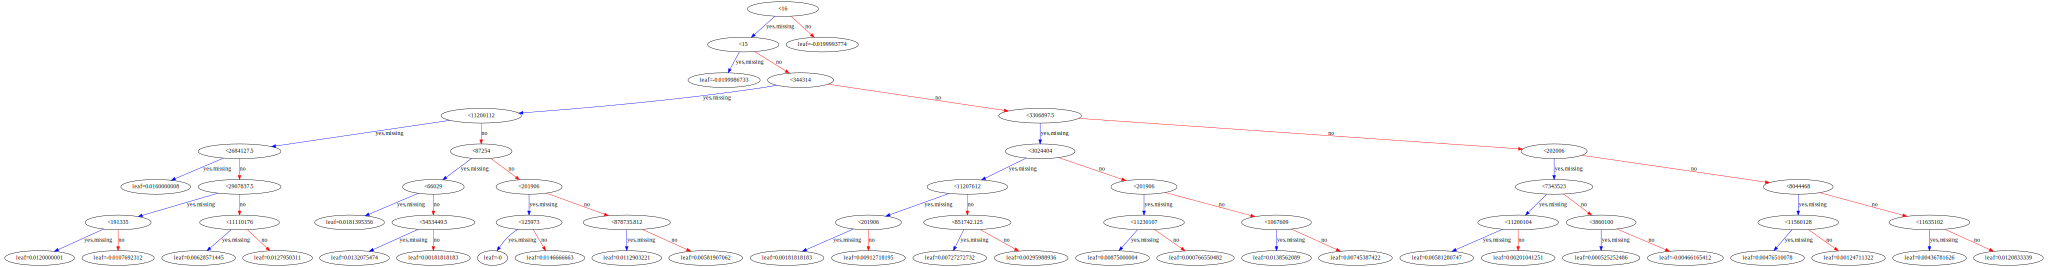

In [102]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

O2O 서비스 이용여부 예측하기 (2110)

In [140]:
b_predict=pd.read_csv("Combined_machine.csv")

In [141]:
b_predict["품목중분류코드"] = b_predict["품목중분류코드"].apply(lambda x: 1 if x == 2110 else 0)

In [142]:
b_predict

,Unnamed: 0,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,법정동코드,매출금액,매출건수,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,0,201903,10,0,0,40.0,3,11530109.0,782521,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
1,1,201903,11,0,0,40.0,3,11530109.0,280991,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
2,2,201903,19,0,0,40.0,3,11530109.0,900212,42,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
3,3,201903,21,0,0,40.0,3,11530109.0,605756,29,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
4,4,201903,16,0,0,40.0,3,11530109.0,419276,21,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315197,315197,202103,21,1,1,50.0,4,11170124.0,720728,17,2.040090e+06,9.000598e+06,3.114286e+05,0.0,0.0
315198,315198,202103,21,1,0,60.9,5,11290110.0,385208,7,1.627805e+06,7.466260e+06,0.000000e+00,0.0,0.0
315199,315199,202103,21,1,0,60.9,5,11290110.0,385208,7,1.435750e+05,7.370239e+06,0.000000e+00,0.0,0.0
315200,315200,202103,21,1,0,60.9,5,11560109.0,926404,10,1.597284e+06,8.530831e+06,9.429980e+06,0.0,0.0


In [143]:
X=b_predict.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14]]
y=b_predict.iloc[:,[3]]

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [145]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [146]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [147]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58171
           1       0.90      0.90      0.90      4870

    accuracy                           0.98     63041
   macro avg       0.95      0.94      0.95     63041
weighted avg       0.98      0.98      0.98     63041



In [148]:
featureImportance = baseline.feature_importances_

In [149]:
featureImportance

array([0.01422847, 0.39801635, 0.00874089, 0.02854535, 0.02932462,
       0.06529447, 0.15198441, 0.16104213, 0.04051173, 0.03862504,
       0.05107477, 0.00366228, 0.00894949])

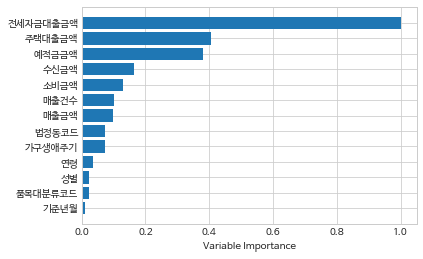

In [151]:
import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos,X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

In [152]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [153]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9,10], 
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.5,0.8,1]
              }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [154]:
xgbc = XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.957012103234403


Text(0.5, 1.0, 'Feature importance')

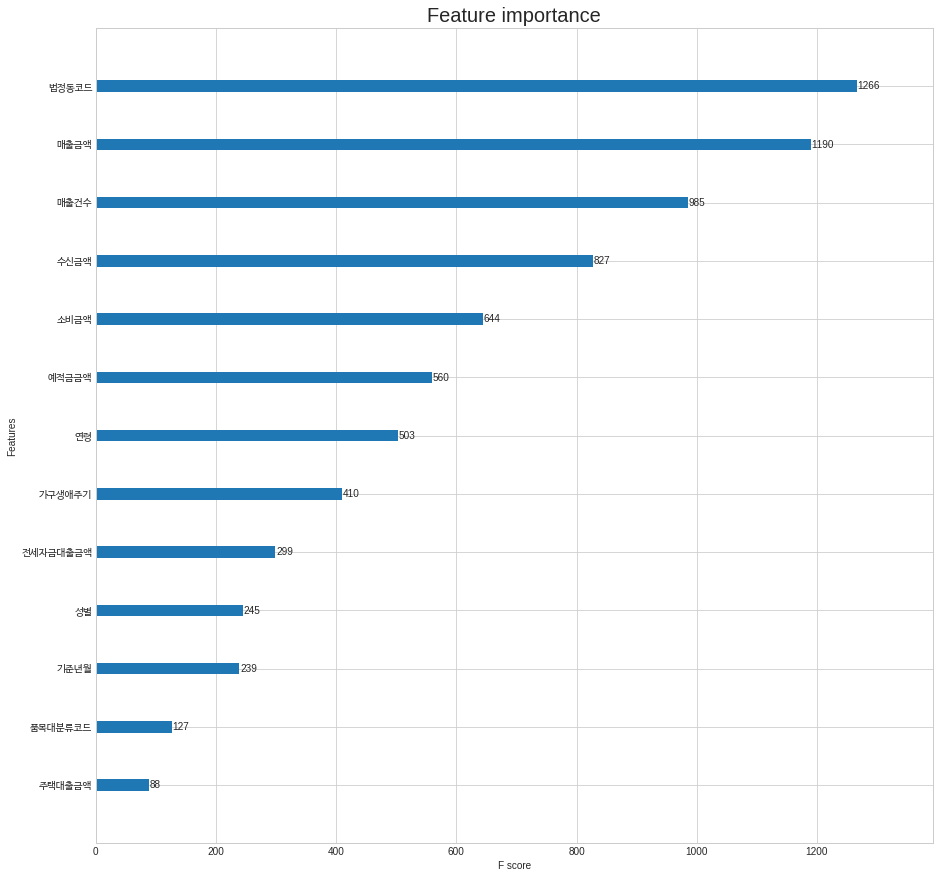

In [155]:
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc, ax=ax)
plt.yticks(fontproperties='NanumBarunGothic') 
plt.title('Feature importance',fontsize=20)

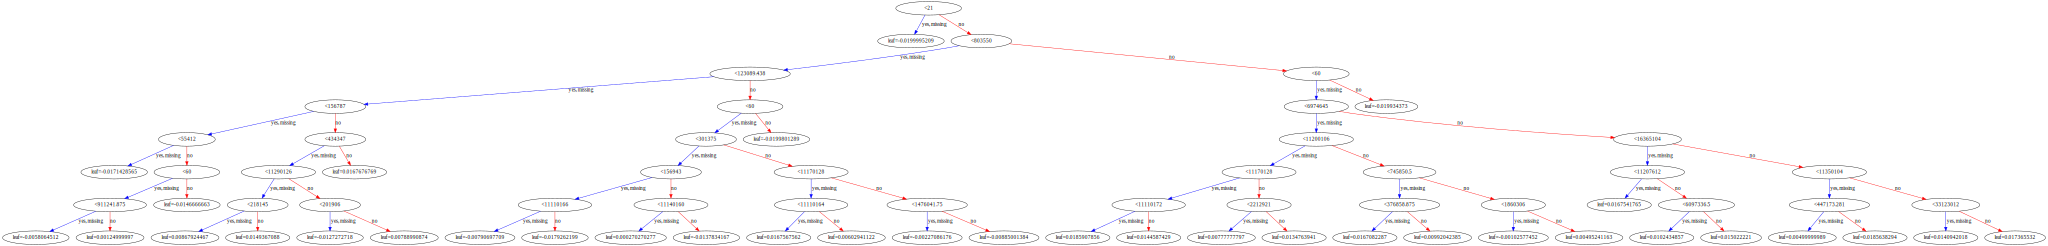

In [156]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph

### 임산부용품 1912

In [157]:
b_predict=pd.read_csv("Combined_machine.csv")

In [158]:
b_predict["품목중분류코드"] = b_predict["품목중분류코드"].apply(lambda x: 1 if x == 1912 else 0)

In [159]:
b_predict

,Unnamed: 0,기준년월,품목대분류코드,품목중분류코드,성별,연령,가구생애주기,법정동코드,매출금액,매출건수,소비금액,수신금액,예적금금액,주택대출금액,전세자금대출금액
0,0,201903,10,0,0,40.0,3,11530109.0,782521,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
1,1,201903,11,0,0,40.0,3,11530109.0,280991,13,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
2,2,201903,19,0,0,40.0,3,11530109.0,900212,42,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
3,3,201903,21,0,0,40.0,3,11530109.0,605756,29,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
4,4,201903,16,0,0,40.0,3,11530109.0,419276,21,1.092591e+06,3.114698e+06,2.974159e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315197,315197,202103,21,0,1,50.0,4,11170124.0,720728,17,2.040090e+06,9.000598e+06,3.114286e+05,0.0,0.0
315198,315198,202103,21,0,0,60.9,5,11290110.0,385208,7,1.627805e+06,7.466260e+06,0.000000e+00,0.0,0.0
315199,315199,202103,21,0,0,60.9,5,11290110.0,385208,7,1.435750e+05,7.370239e+06,0.000000e+00,0.0,0.0
315200,315200,202103,21,0,0,60.9,5,11560109.0,926404,10,1.597284e+06,8.530831e+06,9.429980e+06,0.0,0.0


In [160]:
X=b_predict.iloc[:,[1,2,4,5,6,7,8,9,10,11,12,13,14]]
y=b_predict.iloc[:,[3]]

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [162]:
random_forest= RandomForestClassifier(n_estimators= 50, criterion='gini', min_samples_split=2, n_jobs=-1)

baseline=random_forest

# fit classifier to training set
baseline.fit(X_train.to_numpy(), y_train.to_numpy().ravel())


# make predictions on test set
y_pred=baseline.predict(X_test)


In [163]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [164]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     61839
           1       0.12      0.02      0.04      1202

    accuracy                           0.98     63041
   macro avg       0.55      0.51      0.51     63041
weighted avg       0.96      0.98      0.97     63041



In [165]:
featureImportance = baseline.feature_importances_

In [166]:
featureImportance

array([0.03332556, 0.21437888, 0.00671253, 0.01648914, 0.02492869,
       0.08965068, 0.18275451, 0.10869543, 0.09638147, 0.09877   ,
       0.09779656, 0.01007314, 0.02004341])

In [173]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

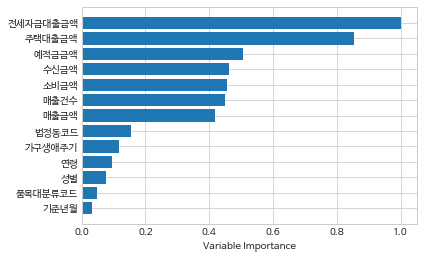

In [174]:
import pylab as plot
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos,X.columns) #wineNa[sorted_idx]
plot.xlabel('Variable Importance')
plot.show()

In [168]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [169]:
xgb_clf = xgb.XGBClassifier()

# parameter 
xgb_param_grid = {'max_depth': [5,7,9,10], 
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.5,0.8,1]
              }

# Create a GridSearchCV object
hr_grid = GridSearchCV(estimator=xgb_clf,
                       param_grid=xgb_param_grid,
                       scoring='roc_auc',
                       n_jobs=-1,
                       cv=5,
                       refit=True, 
                       return_train_score=True)

In [170]:
xgbc = XGBClassifier(max_depth=7, n_estimators=100, colsample_bytree=0.5, learning_rate=0.01,subsample=0.8,min_child_weight=1) ### colsample_bytee, subsample 1로 두면 오버 피팅되어서 여기서는 정확도는 올라가는데 실제 점수는 더 낮음
xgbc.fit(X_train,y_train)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(y_test, prediction_xgb))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9809330435748164


Text(0.5, 1.0, 'Feature importance')

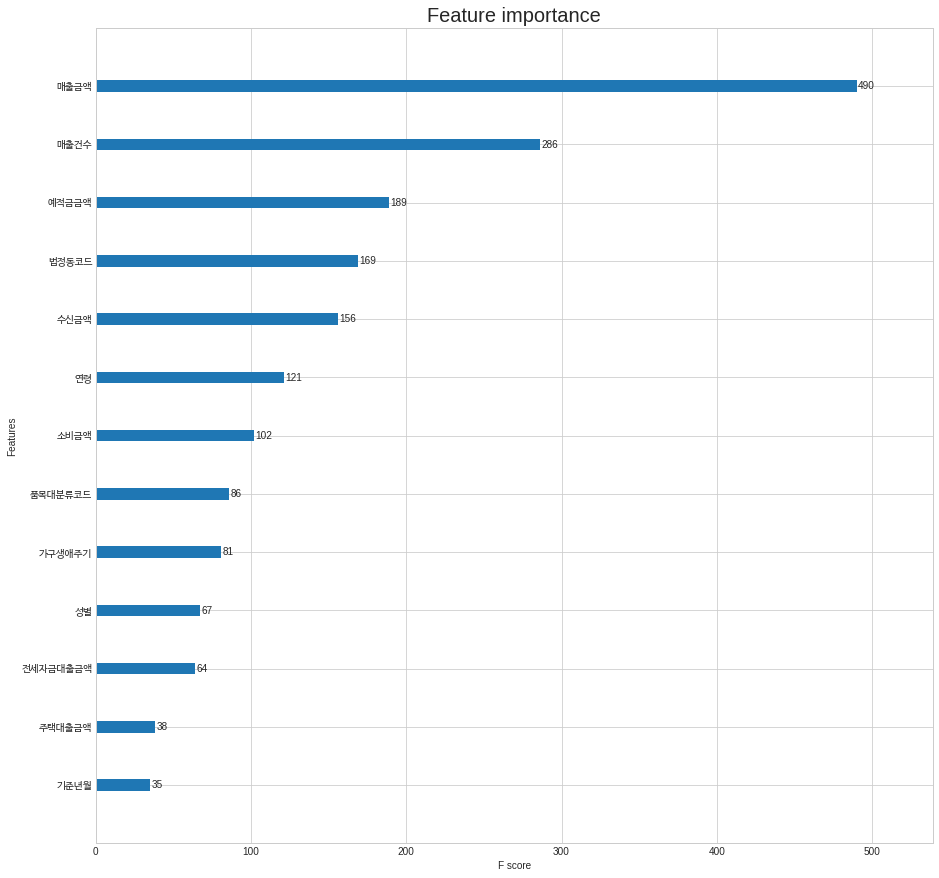

In [171]:
import graphviz
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.style.use(['seaborn-whitegrid'])
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc, ax=ax)
plt.yticks(fontproperties='NanumBarunGothic') 
plt.title('Feature importance',fontsize=20)

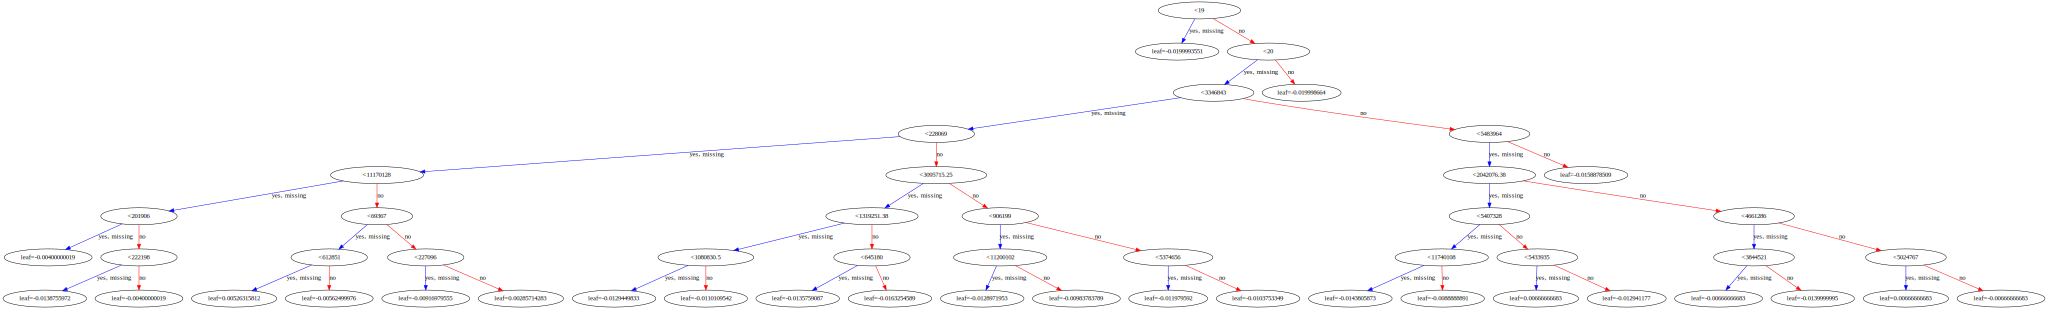

In [172]:
##첫번째 트리구조
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
graph = graphviz.Source(dot_data)
graph